# 3.1	Using AI Techniques for Analyzing Text Data

## Data initialization

In [1]:
!wget https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/Restaurants/restaurants.csv

--2024-10-30 08:55:48--  https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/Restaurants/restaurants.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1308809 (1.2M) [text/plain]
Saving to: ‘restaurants.csv’

restaurants.csv     100%[===================>]   1.25M  --.-KB/s    in 0.08s   

2024-10-30 08:55:49 (15.8 MB/s) - ‘restaurants.csv’ saved [1308809/1308809]



In [2]:
import pandas as pd
df = pd.read_csv("/content/restaurants.csv", encoding='UTF8')
df.shape

(2381, 6)

In [3]:
df

,Rank,CommentDate,RestaurantName,Comment,StarRating,Price
0,1,2023-09-16,GRANVILLE,Great ambiance indoors and attentive staff. Re...,4.4,$$
1,1,2023-09-15,GRANVILLE,Wrong wrong wrong. Â AIf you don't fit the Ty...,4.4,$$
2,1,2023-09-07,GRANVILLE,Bad service!! The worst servers. Marcos the ma...,4.4,$$
3,1,2023-09-06,GRANVILLE,One of my absolute favorite places in WeHo for...,4.4,$$
4,1,2023-09-05,GRANVILLE,Always a good experience and food is great.Tea...,4.4,$$
...,...,...,...,...,...,...
2376,240,2023-06-27,Love Hour,"Amazing beef burgers, chickens sandwiches, sid...",4.8,$$
2377,240,2023-06-07,Love Hour,I had these on a pop-up location - really amaz...,4.8,$$
2378,240,2023-05-29,Love Hour,Absolute best hamburger I've ever had. Friendl...,4.8,$$
2379,240,2023-05-20,Love Hour,I LOVE LOVE HOUR. Might get the logo tatted on...,4.8,$$


## Sentiment analysis with VADER

In [10]:
import nltk
from nltk.wsd import lesk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer() #A: Initialize the VADER sentiment analyzer

def analyze_sentiment(comment): #B:  Define a function to get sentiment based on the comment
    scores = sia.polarity_scores(comment)
    if scores['compound'] >= 0.05:
        return "Positive"
    elif scores['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

#C: Apply the function to the 'Comment' column and create a new column 'Sentiment'
df['vader_Sentiment'] = df['Comment'].apply(analyze_sentiment)

df[['Comment', 'vader_Sentiment', 'StarRating']] #D: Display the DataFrame with the new Sentiment column

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Comment,vader_Sentiment,StarRating
0,Great ambiance indoors and attentive staff. Re...,Positive,4.4
1,Wrong wrong wrong. Â AIf you don't fit the Ty...,Negative,4.4
2,Bad service!! The worst servers. Marcos the ma...,Negative,4.4
3,One of my absolute favorite places in WeHo for...,Positive,4.4
4,Always a good experience and food is great.Tea...,Positive,4.4
...,...,...,...
2376,"Amazing beef burgers, chickens sandwiches, sid...",Positive,4.8
2377,I had these on a pop-up location - really amaz...,Positive,4.8
2378,Absolute best hamburger I've ever had. Friendl...,Positive,4.8
2379,I LOVE LOVE HOUR. Might get the logo tatted on...,Positive,4.8


In [11]:
df[df['vader_Sentiment'] == "Neutral"]

,Rank,CommentDate,RestaurantName,Comment,StarRating,Price,vader_Sentiment,RoundedRating,MappedSentiment
123,13,2023-09-16,Sun Nong Dan,í´ë¬ë¹ í ì¤ì  ë¤ìì¯¤ ê°ëë° ì¬ë...,4.3,$$,Neutral,4.0,Positive
441,46,2023-09-16,Bacari Silverlake,MICE! There's mice in the trees Â went for my ...,4.6,NaN,Neutral,5.0,Positive
971,98,2023-09-05,Lemon Grove,I was excited to check out this place. My frie...,4.4,NaN,Neutral,4.0,Positive
1088,109,2023-09-09,Izakaya Osen - Los Angeles,ç°¡å®çåäººï¼ä¸æ²è¿·æ¼å¹»æ³ï¼ä¸è«ç...,4.3,$$,Neutral,4.0,Positive
1494,151,2023-09-13,Tu Madre - West Hollywood,Tu Madre is a must visit every time i come to ...,4.1,$$,Neutral,4.0,Positive
1555,157,2023-08-29,Yuk Dae Jang,I was a lil sad bc it was my first experience ...,4.4,$$,Neutral,4.0,Positive
1823,184,2023-09-15,Langer's Delicatessen,Nothing special actually not good at all. I or...,4.4,$$,Neutral,4.0,Positive
1861,187,2023-09-15,Casablanca Moroccan kitchens,"Food, service & ambiance on a 100. This place ...",4.7,NaN,Neutral,5.0,Positive
1872,188,2023-03-15,Jail Joa,This place got closed down by the Department o...,4.6,$$,Neutral,5.0,Positive
1900,191,2023-08-29,Bolt,So good!The food and coffee are great!The staf...,4.3,$$,Neutral,4.0,Positive


Plot the result:

In [5]:
df["vader_Sentiment"].value_counts() / df.shape[0] * 100

,count
vader_Sentiment,
Positive,91.936161
Negative,7.223856
Neutral,0.839983


In [6]:
# Define the mapping between ratings and sentiment values
rating_sentiment_map = {
    1: 'Negative',
    2: 'Negative',
    3: 'Neutral',
    4: 'Positive',
    5: 'Positive'
}
# Round the StarRating to the nearest whole number
df['RoundedRating'] = df['StarRating'].round()
# Map the sentiments to the ratings based on the predefined mapping
df['MappedSentiment'] = df['RoundedRating'].map(rating_sentiment_map)
df[['MappedSentiment', 'StarRating']].head()

,MappedSentiment,StarRating
0,Positive,4.4
1,Positive,4.4
2,Positive,4.4
3,Positive,4.4
4,Positive,4.4


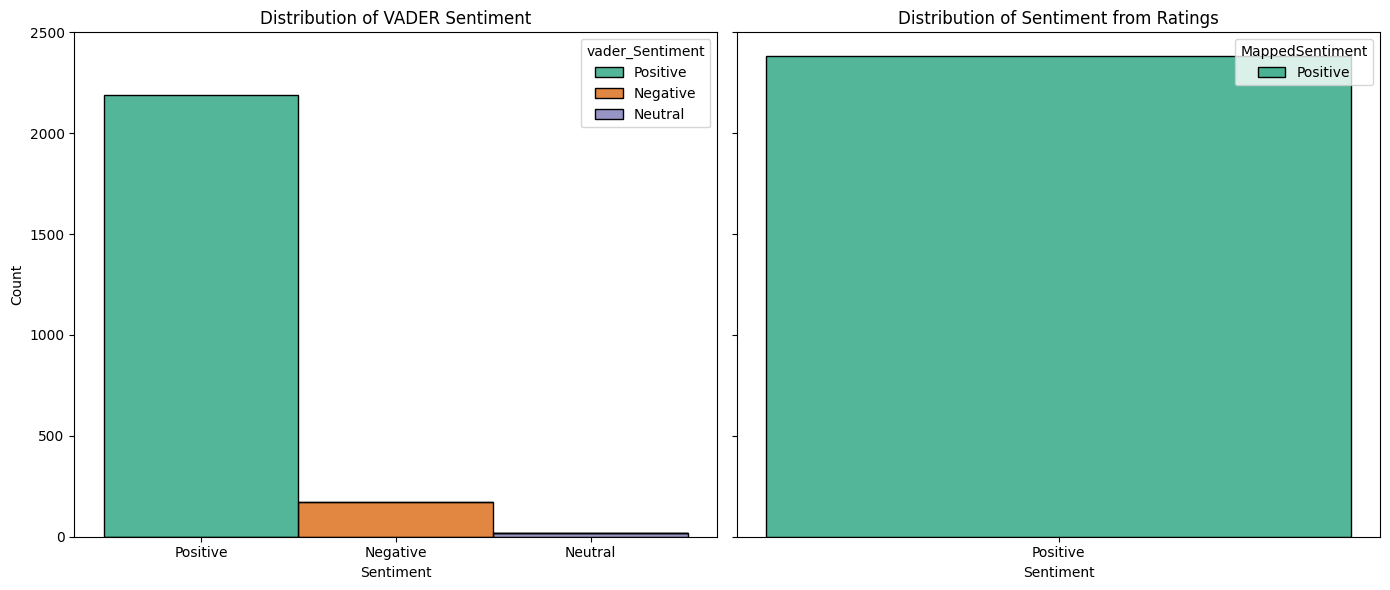

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot histogram for vader_Sentiment
sns.histplot(data=df, x='vader_Sentiment', hue='vader_Sentiment', multiple='stack', palette='Dark2', ax=ax[0])
ax[0].set_title('Distribution of VADER Sentiment')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylabel('Count')

# Plot histogram for MappedSentiment
sns.histplot(data=df, x='MappedSentiment', hue='MappedSentiment', multiple='stack', palette='Dark2', ax=ax[1])
ax[1].set_title('Distribution of Sentiment from Ratings')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

Display the list of rows where the vader_Sentiment column differs from the sentiment column

In [8]:
# Filter the DataFrame where 'vader_Sentiment' is different from 'another_Sentiment'
mismatched_rows = df[df['vader_Sentiment'] != df['MappedSentiment']]
# Display the mismatched rows
mismatched_rows

,Rank,CommentDate,RestaurantName,Comment,StarRating,Price,vader_Sentiment,RoundedRating,MappedSentiment
1,1,2023-09-15,GRANVILLE,Wrong wrong wrong. Â AIf you don't fit the Ty...,4.4,$$,Negative,4.0,Positive
2,1,2023-09-07,GRANVILLE,Bad service!! The worst servers. Marcos the ma...,4.4,$$,Negative,4.0,Positive
8,1,2023-08-31,GRANVILLE,Food was fine. Follow up service was non exist...,4.4,$$,Negative,4.0,Positive
34,4,2023-09-09,L'Antica Pizzeria Da Michele,The pizza and food is good but they pump the p...,4.3,$$$,Negative,4.0,Positive
35,4,2023-09-08,L'Antica Pizzeria Da Michele,Fantastic pizza!Made with Italian flour import...,4.3,$$$,Negative,4.0,Positive
...,...,...,...,...,...,...,...,...,...
2260,228,2023-09-15,H Cafe,I like the pancake ... sandwich was good! But ...,4.2,$$,Negative,4.0,Positive
2275,229,2023-08-19,Hearts & Flame,What a horrible experience!!!!We booked a part...,4.1,$$$,Negative,4.0,Positive
2283,230,2023-09-02,Kismet,I went to this restaurant because it was recom...,3.8,$$,Negative,4.0,Positive
2299,231,2023-07-09,HanShik Express,Only reason I give this place one star is beca...,4.5,$$,Negative,4.0,Positive


## Named Entity Recognition (NER)

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

See more info here: https://spacy.io/models/  
Labels for the English model:
* PERSON:      People, including fictional.
* NORP:        Nationalities or religious or political groups.
* FAC:         Buildings, airports, highways, bridges, etc.
* ORG:         Companies, agencies, institutions, etc.
* GPE:         Countries, cities, states.
* LOC:         Non-GPE locations, mountain ranges, bodies of water.
* PRODUCT:     Objects, vehicles, foods, etc. (Not services.)
* EVENT:       Named hurricanes, battles, wars, sports events, etc.
* WORK_OF_ART: Titles of books, songs, etc.
* LAW:         Named documents made into laws.
* LANGUAGE:    Any named language.
* DATE:        Absolute or relative dates or periods.
* TIME:        Times smaller than a day.
* PERCENT:     Percentage, including ”%“.
* MONEY:       Monetary values, including unit.
* QUANTITY:    Measurements, as of weight or distance.
* ORDINAL:     “first”, “second”, etc.
* CARDINAL:    Numerals that do not fall under another type.

In [ ]:
# Function to extract named entities
def extract_named_entities(comment):
    doc = nlp(comment)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply the function to the 'Comment' column and create a new column 'Named_Entities'
df['Named_Entities'] = df['Comment'].apply(extract_named_entities)

In [ ]:
df[["Comment", 'Named_Entities']].head()

,Comment,Named_Entities
0,Great ambiance indoors and attentive staff. Re...,"[(Cedars, PRODUCT), (one, CARDINAL), (Strogano..."
1,Wrong wrong wrong. Â AIf you don't fit the Ty...,"[(Ty, PERSON)]"
2,Bad service!! The worst servers. Marcos the ma...,"[(Marcos, PERSON), (Thursday 9/7/2023, DATE), ..."
3,One of my absolute favorite places in WeHo for...,"[(One, CARDINAL), (WeHo, LOC)]"
4,Always a good experience and food is great.Tea...,[]


In [ ]:
df['Comment'][5]

"These five stars are for the food, service, and ambiance.First off, I love how this location allows reservations unlike the one in Pasadena.Secondly the customer service was off the chain. I know there are plenty of snooty customers here daily, I witnessed many while dining here. But that's not what we are here for lol our waitress Charis M and manager Celine were exceptional. This was the first time my friends and I dined here for brunch and we will definitely be coming back.From the drink recommendations to the food everything was delicious and tasteful,It was a group of six of us and we all enjoyed a variety of items on the menu. I will say the grilled cheese dipper and skirt steaks were highlights of the dishes,The cucumber martini was phenomenal , lemon drops were also delicious! Overall our experience here was a really good one thanks to Charis and Celine please continue to hire wonderful employees like these ladies!"

In [ ]:
df['Named_Entities'][5]

[('five', 'CARDINAL'),
 ('First', 'ORDINAL'),
 ('Pasadena', 'GPE'),
 ('Secondly', 'ORDINAL'),
 ('daily', 'DATE'),
 ('Charis M', 'ORG'),
 ('Celine', 'PERSON'),
 ('first', 'ORDINAL'),
 ('six', 'CARDINAL'),
 ('Charis', 'GPE'),
 ('Celine', 'ORG')]

We are only insterested in the locations, we can create a Function to extract only GPE entities, remove duplicates, and return as a comma-separated string

In [ ]:
def extract_gpe_entities(comment):
    doc = nlp(comment)
    gpe_entities = {ent.text for ent in doc.ents if ent.label_ == "GPE"}  #A: Use a set to remove duplicates
    return ", ".join(sorted(gpe_entities))  #B: Join the entities with a comma separator, sorted for consistency

#C: Apply the function to the 'Comment' column and create a new column 'GPE_Entities'
df['GPE_Entities'] = df['Comment'].apply(extract_gpe_entities)
df['GPE_Entities'].value_counts()

,count
GPE_Entities,
,1747
LA,141
Hollywood,34
Los Angeles,26
Koreatown,10
...,...
America,1
Openaire,1
"here!""We",1


We still have duplicates, for example LA is the same as Los Angeles. We can for that use dictionnaries:

In [ ]:
# Dictionary for normalizing common GPE aliases
GPE_NORMALIZATION = {
    "LA": "Los Angeles",
    "Los Angeles": "Los Angeles",
    "New York City": "New York",
    "NYC": "New York"
    # Add more mappings as needed
}

# Function to extract only GPE entities, normalize them, remove duplicates, and return as a comma-separated string
def extract_gpe_entities(comment):
    doc = nlp(comment)
    # Extract GPE entities
    gpe_entities = {GPE_NORMALIZATION.get(ent.text, ent.text) for ent in doc.ents if ent.label_ == "GPE"}
    # Join normalized and unique GPEs as a comma-separated string
    return ", ".join(sorted(gpe_entities))

# Apply the function to the 'Comment' column and create a new column 'GPE_Entities'
df['GPE_Entities'] = df['Comment'].apply(extract_gpe_entities)
df['GPE_Entities'].value_counts()

,count
GPE_Entities,
,1747
Los Angeles,172
Hollywood,34
Koreatown,10
Beverly Hills,7
...,...
Tteokbokki,1
ddukbokgi,1
Newport Beach,1


## Topic classification



Using BERT & BERTopic

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
!wget https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/BBC%20News/bbc_news.csv

--2024-09-10 09:34:16--  https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/BBC%20News/bbc_news.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 496544 (485K) [text/plain]
Saving to: ‘bbc_news.csv’

bbc_news.csv        100%[===================>] 484.91K  --.-KB/s    in 0.05s   

2024-09-10 09:34:16 (10.1 MB/s) - ‘bbc_news.csv’ saved [496544/496544]



In [ ]:
dfnews = pd.read_csv("/content/bbc_news.csv", encoding='UTF8')
print(dfnews.shape)
dfnews.head()

(1507, 5)


,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Combine title and description
dfnews['text'] = dfnews['title'] + ' ' + dfnews['description']

# Preprocess dataset
vectorizer = CountVectorizer(stop_words="english", min_df=.10, max_df=10)

# Build a BERTopic model
topic_model = BERTopic(vectorizer_model=vectorizer, min_topic_size=20)
topics, probs = topic_model.fit_transform(dfnews['text'])
dfnews['topic'] = topics # Add the 'topic' column to dfnews

# Get the topic info
topic_info = topic_model.get_topic_info()

# Create a dictionary mapping topic numbers to topic names
topic_dict = dict(zip(topic_info['Topic'], topic_info['Name']))

# Add the 'topic_name' column to dfnews
dfnews['topic_name'] = dfnews['topic'].map(topic_dict)

dfnews

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,title,pubDate,guid,link,description,text,topic,topic_name
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...,Ukraine: Angry Zelensky vows to punish Russian...,-1,-1_ukraine_war_russian_ukrainian
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as...",War in Ukraine: Taking cover in a town under a...,1,1_ukraine_war_russian_mariupol
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...,Ukraine war 'catastrophic for global food' One...,0,0_sanctions_energy_russia_gas
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...,Manchester Arena bombing: Saffie Roussos's par...,-1,-1_ukraine_war_russian_ukrainian
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...,Ukraine conflict: Oil price soars to highest l...,0,0_sanctions_energy_russia_gas
...,...,...,...,...,...,...,...,...
1502,Pink Floyd reunite for Ukraine protest song,"Fri, 08 Apr 2022 09:51:54 GMT",https://www.bbc.co.uk/news/entertainment-arts-...,https://www.bbc.co.uk/news/entertainment-arts-...,The band's first new material in 28 years was ...,Pink Floyd reunite for Ukraine protest song Th...,1,1_ukraine_war_russian_mariupol
1503,The Papers: Sunak's bid to 'save' career and '...,"Sat, 09 Apr 2022 05:11:38 GMT",https://www.bbc.co.uk/news/blogs-the-papers-61...,https://www.bbc.co.uk/news/blogs-the-papers-61...,Many papers lead with news the chancellor's wi...,The Papers: Sunak's bid to 'save' career and '...,0,0_sanctions_energy_russia_gas
1504,Ukraine war: The school that helped fleeing mu...,"Fri, 08 Apr 2022 23:01:45 GMT",https://www.bbc.co.uk/news/world-europe-61038463,https://www.bbc.co.uk/news/world-europe-610384...,A group of young musicians from Kharkiv and Od...,Ukraine war: The school that helped fleeing mu...,12,12_children_ukraine_safe_war
1505,Week in pictures: 2 - 8 April 2022,"Sat, 09 Apr 2022 00:03:34 GMT",https://www.bbc.co.uk/news/in-pictures-61038961,https://www.bbc.co.uk/news/in-pictures-6103896...,A selection of powerful images from all over t...,Week in pictures: 2 - 8 April 2022 A selection...,-1,-1_ukraine_war_russian_ukrainian


In [ ]:
dfnews['topic_name'].value_counts()

,count
topic_name,
-1_ukraine_war_russian_ukrainian,568
0_sanctions_energy_russia_gas,159
1_ukraine_war_russian_mariupol,153
2_england_cup_world_womens,108
3_oscars_awards_film_star,104
4_league_chelsea_manchester_champions,98
5_covid_cases_coronavirus_area,94
6_plane_murder_police_partner,44
7_bridges_event_escooter_skin,38


In [ ]:
outliers_count = (dfnews['topic'] == -1).sum()
print(f"Number of articles in outlier topic: {outliers_count}")

Number of articles in outlier topic: 568


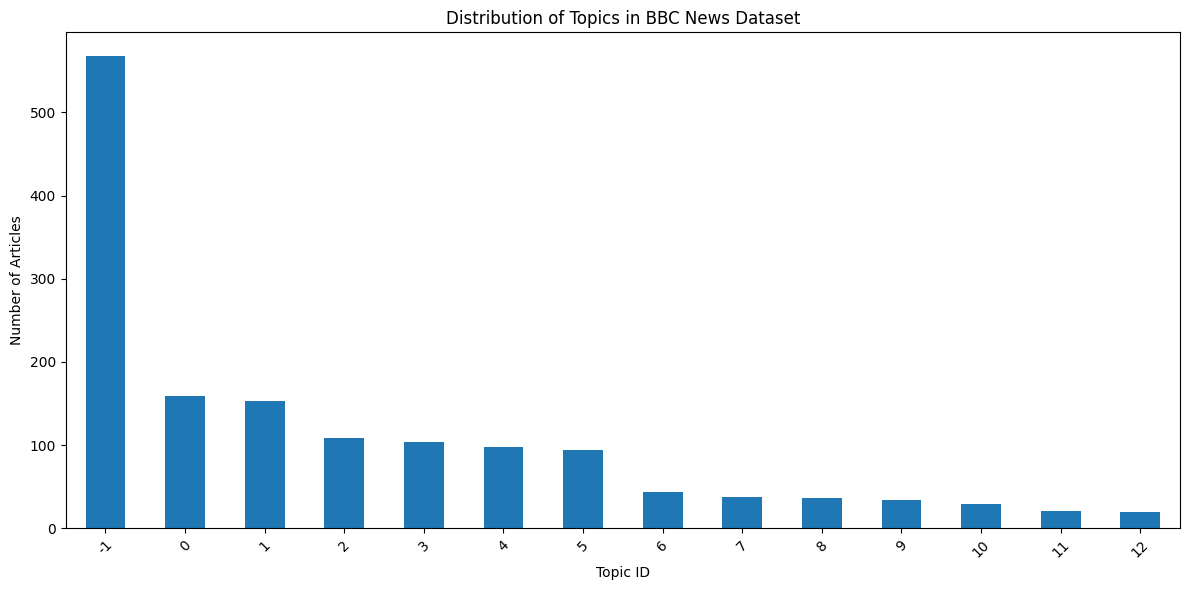

In [ ]:
# Get the documents for the top topic (excluding -1 which is for outliers)
top_topic = topic_info[topic_info['Topic'] != -1]['Topic'].iloc[0]
top_topic_docs = topic_model.get_representative_docs(top_topic)

# Create a histogram of topics
plt.figure(figsize=(12, 6))
topic_counts = dfnews['topic'].value_counts().sort_index()
topic_counts.plot(kind='bar')
plt.title('Distribution of Topics in BBC News Dataset')
plt.xlabel('Topic ID')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Visualize the topics
fig = topic_model.visualize_topics()
fig.show()

In [ ]:
# Visualize the documents with their topics
fig = topic_model.visualize_documents(dfnews['text'])
fig.show()

In [ ]:
dfnews[['title', 'description', 'topic_name']].head(5)

,title,description,topic_name
0,Ukraine: Angry Zelensky vows to punish Russian...,The Ukrainian president says the country will ...,-1_ukraine_war_russian_ukrainian
1,War in Ukraine: Taking cover in a town under a...,"Jeremy Bowen was on the frontline in Irpin, as...",1_ukraine_war_russian_mariupol
2,Ukraine war 'catastrophic for global food',One of the world's biggest fertiliser firms sa...,0_sanctions_energy_russia_gas
3,Manchester Arena bombing: Saffie Roussos's par...,The parents of the Manchester Arena bombing's ...,-1_ukraine_war_russian_ukrainian
4,Ukraine conflict: Oil price soars to highest l...,Consumers are feeling the impact of higher ene...,0_sanctions_energy_russia_gas


# 3.2	Using AI and Computer Vision to Analyze Unstructured Documents

### Initializations

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [ ]:
!wget https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/Images/test-image.png

--2024-09-10 09:36:55--  https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/Images/test-image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332636 (325K) [image/png]
Saving to: ‘test-image.png.1’

test-image.png.1    100%[===================>] 324.84K  --.-KB/s    in 0.04s   

2024-09-10 09:36:55 (7.50 MB/s) - ‘test-image.png.1’ saved [332636/332636]



## 3.3.2	Optical Character Recognition (OCR) for extracting text from images and documents

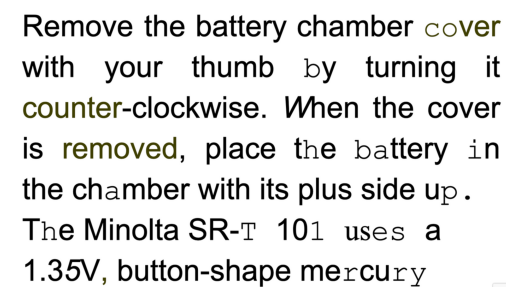

Extracted text:
Remove the battery chamber cover
with your thumb by turning it
counter-clockwise. When the cover
is removed, place the battery in
the chamber with its plus side up.
The Minolta SR-T 101 uses a
1.35V, button-shape mercury



In [ ]:
# Open the image file
img = Image.open("/content/test-image.png")

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Perform OCR on the image
text = pytesseract.image_to_string(img)

# Print the extracted text
print("Extracted text:")
print(text)

# 3.3	Applying AI Clustering Algorithms for Identifying Patterns

## K-Means example with the Titanic Dataset

In [ ]:
!wget https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/Titanic%20disaster/train.csv

--2024-09-10 09:36:59--  https://raw.githubusercontent.com/datacorner/dataprep-handbook/main/Titanic%20disaster/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2024-09-10 09:36:59 (4.03 MB/s) - ‘train.csv.1’ saved [60302/60302]



In [ ]:
import pandas as pd
df = pd.read_csv("/content/train.csv")

Preprocess the data

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['Pclass', 'Age', 'Fare']
X = df[features].copy()

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Determine optimal number of clusters using elbow method

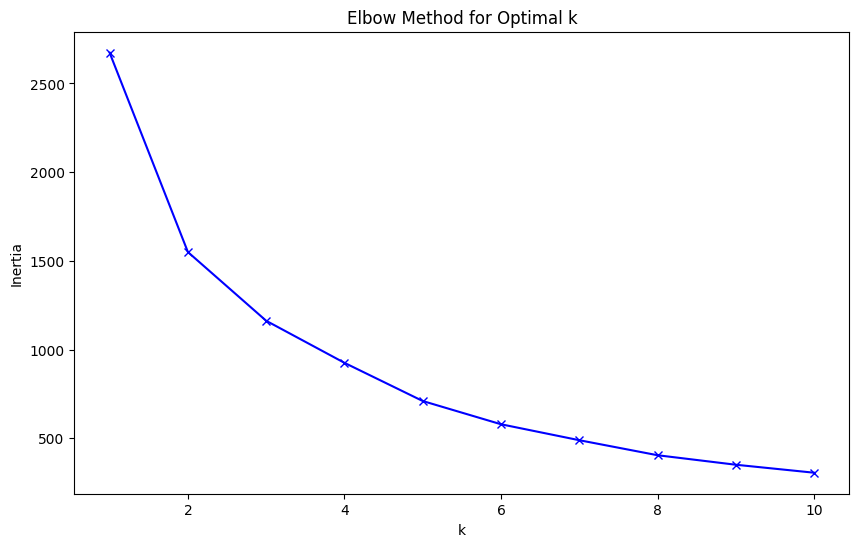

In [ ]:
inertias = []
# Inertia is the sum of squared distances of samples to their closest cluster center.
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

The elbow plot will help decide on the optimal number of clusters. The point where the decrease in inertia starts to level off is often a good choice for the number of clusters.

In [ ]:
# Choose number of clusters (let's say 3 for this example)
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
cluster_summary = df.groupby('Cluster').agg({
    'Survived': 'mean',
    'Pclass': 'mean',
    'Age': 'mean',
    'Fare': 'mean',
    'Sex': lambda x: x.value_counts().index[0]  # most common sex
}).round(2)

print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         Survived  Pclass    Age    Fare     Sex
Cluster                                         
0            0.55    1.29  41.80   48.27    male
1            0.30    2.80  23.96   15.09    male
2            0.70    1.00  28.00  226.81  female


Visualize the clusters

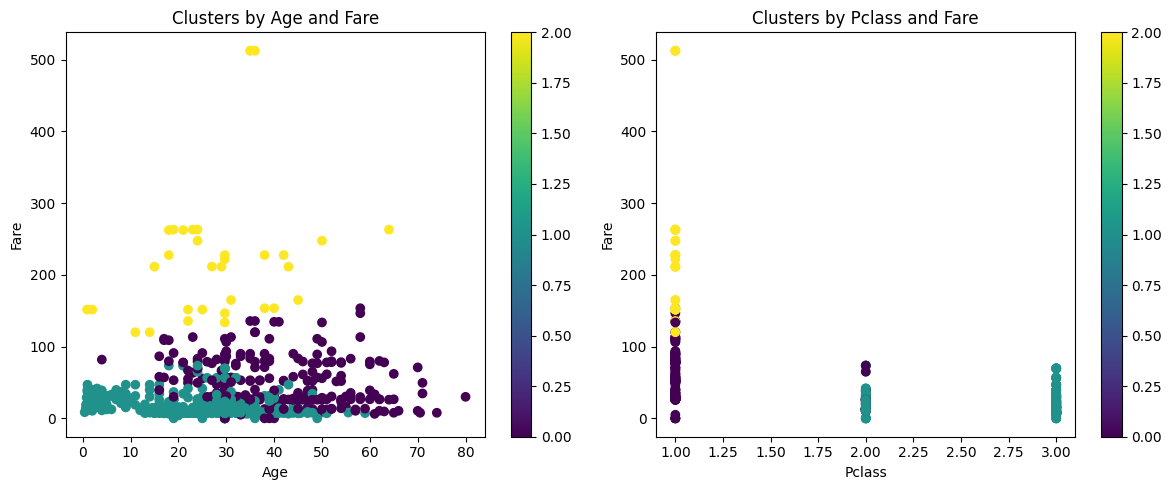

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X['Age'], X['Fare'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Clusters by Age and Fare')
plt.colorbar(scatter)

plt.subplot(1, 2, 2)
scatter = plt.scatter(X['Pclass'], X['Fare'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Clusters by Pclass and Fare')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

## K-Means example with the Old Faithful Geyser Dataset

Let's the dataset: Old Faithful Geyser Data. This dataset contains information about eruptions of the Old Faithful geyser in Yellowstone National Park.

Load the Old Faithful dataset

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/geyser.csv")
data.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


Elbow method to find the optimal number of clusters

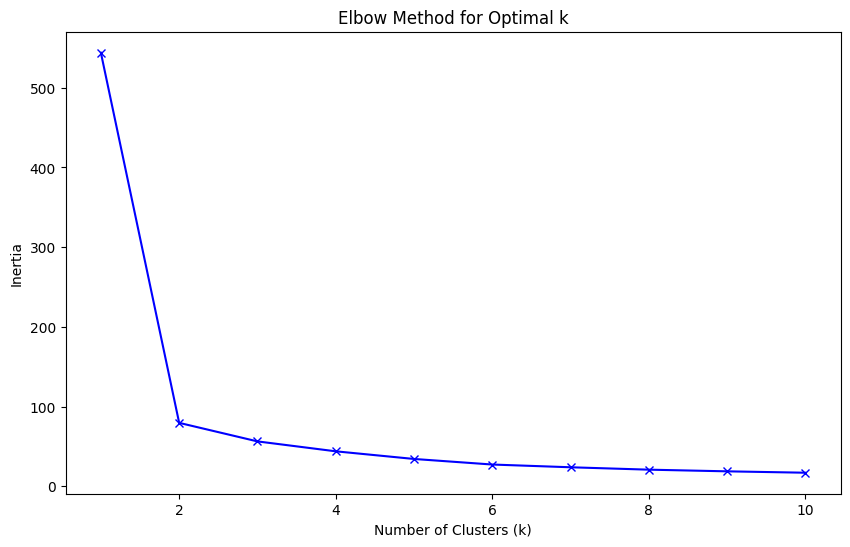

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Extract features
X = data[['waiting', 'duration']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

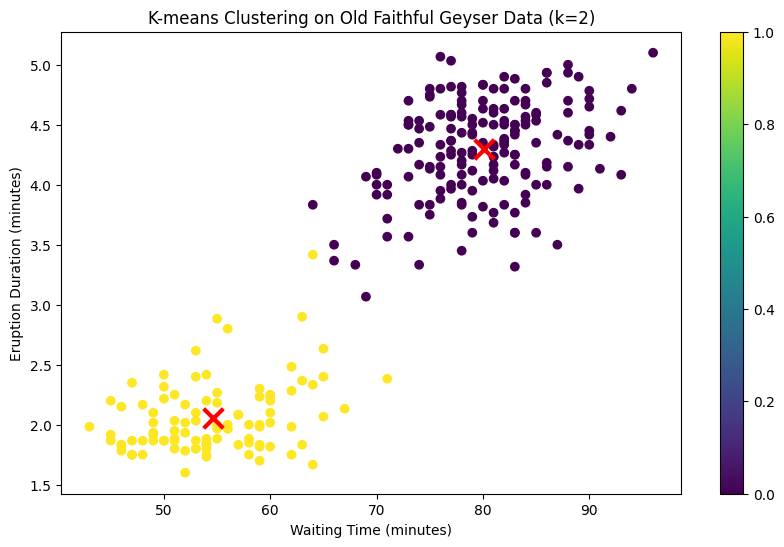

Cluster Centroids:
Cluster 1: Waiting Time = 80.08 minutes, Eruption Duration = 4.30 minutes
Cluster 2: Waiting Time = 54.59 minutes, Eruption Duration = 2.05 minutes


In [ ]:
# Based on the elbow method, let's choose the optimal number of clusters
optimal_k = 2  # You can adjust this based on the elbow curve

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title(f'K-means Clustering on Old Faithful Geyser Data (k={optimal_k})')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Eruption Duration (minutes)')
plt.colorbar(scatter)
plt.show()

# Print cluster centroids
print("Cluster Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: Waiting Time = {centroid[0]:.2f} minutes, Eruption Duration = {centroid[1]:.2f} minutes")

This is what we did above ...

* We calculate the inertia (within-cluster sum of squares) for different numbers of clusters (K) ranging from 1 to 10.
* We plot the elbow curve, which shows the inertia for each value of K.
* Based on the elbow curve, we choose the optimal number of clusters. In this case, I've set it to 2, but you can adjust this based on what you observe in the elbow curve.
* We then proceed with the K-means clustering using the optimal number of clusters.

When running this script, we see two plots:

* The elbow curve, which helps in determining the optimal number of clusters.
The clustering results plot, similar to the previous version.

* The elbow method works by looking for an "elbow" in the curve - a point where the rate of decrease in inertia starts to level off. This point often suggests a good balance between the number of clusters and the inertia.
For the Old Faithful dataset, you'll likely see that the elbow occurs around K=2, confirming that two clusters is indeed a good choice for this data.

This script does the following:
* Imports necessary libraries and loads the dataset, similar to the K-means example.
* Standardizes the features.
* Defines a function plot_k_distance_graph to help determine a suitable eps value for DBSCAN. This is analogous to the elbow method for K-means.
* Plots the k-distance graph.
* Applies DBSCAN with chosen eps and min_samples values.
* Visualizes the clustering results.
* Prints the number of clusters found and the number of noise points.
* Prints statistics for each cluster.

The key differences from K-means are:
* We don't need to specify the number of clusters beforehand.
* We use the k-distance graph to help choose the eps parameter
* DBSCAN can identify noise points (labeled as -1).

* The shape of the clusters can be more flexible.

When running this script, we see two plots:
* The k-distance graph, which helps in determining a suitable eps value.
* The clustering results plot.